In [1755]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wbgapi as wb

In [1756]:
#defining function that creates a dataframe 
def create_dataframe(data, filter_1, filter_2):
    """ Function for creating dataframe
        data: data file to be read
        filter_1 and 2: for splitting the dataframe to 2
    """
    
    #read the csv fill and dropna
    df = pd.read_csv(data).dropna()
    df = df.set_index('Series Name')
    
    #filter dataframe to split dataframe
    df1 = df.filter(regex = filter_1, axis=0)
    df2 = df.filter(regex = filter_2, axis=0)
    
    #cleaning up the dataframes to get specific index and column
    df1 = df1.set_index(['Country Name'])
    df2 = df2.set_index(['Country Name'])
    df1 = df1.drop(['Country Code', 'Series Code'], axis = 1)
    df2 = df2.drop(['Country Code', 'Series Code'], axis = 1)
    df1.columns = df1.columns.str.replace("YR","")
    df2.columns = df2.columns.str.replace("YR","")
    
    #set index
    df1.index.names = ['Region']
    df2.index.names = ['Region']
    
    #return two dataframe and transpose one of it
    return df1, df2.transpose()

In [1732]:
#defining function that plot
def plots(column, title, ylabel):
    """ Function for crating plot
        column: the column we intend to plot
        title: the title for our plot
        ylabel: label for the y axis
    """
    plt.figure()
    plt.plot(column, label=str(title))
    plt.title( str(title)+' '+ str(ylabel))
    plt.xticks(rotation=70)
    plt.xlabel('year')
    plt.ylabel(str(ylabel))
    plt.legend()
    plt.show()

In [1733]:
#defining function that create a bar chat
def bar(x, y, title):
    """Function for creating plot:
       x: the x axis
       y: the y axis
       title: the title for the bar chart
    """
    plt.figure()
    plt.bar(x, y)
    plt.xticks(rotation=70)
    plt.title(str(title))
    plt.ylabel('Co2 Emission(kT)')
    plt.xlabel('year')
    plt.show()

In [1734]:
#defining function to get correlation between two dataframe
def correlation(df1, df2):
    """Functions for creating a correlation table
       between two data frame
       df1: first dataframe
       df2: second dataframe
    """
    correlation = df1.corrwith(df2, axis = 1)
    return(correlation)

In [1735]:
#defining function that box plot
def boxplot(column, title, ylabel):
    """ Function for crating box plot
        column: the column we intend to plot
        title: the title for our plot
        ylabel: label for the y axis
    """
    plt.boxplot(column, labels=column.columns)
    plt.title(str(title))
    plt.xlabel('year')
    plt.ylabel(str(ylabel))
    plt.xticks(rotation=70)
    plt.show()

In [1736]:
#function to get mean
def mean(df):
    """Function for getting mean
       df: dataframe or column
    """
    df_mean = df.mean()
    return df_mean

In [1737]:
#using the create_dataframe function to create two dataframe
#fossil = Fossil fuel energy consumption (% of total)
#co2 = co2 Emission(kt)
fossil, co2= create_dataframe(
    '~/Downloads/applied course work/data b.csv',
    'Fossil',
    'CO2')

In [1738]:
#cleaning up the dataframe 
fossil.columns = ['2001','2002', '2003', '2004', '2005',
                  '2006', '2007','2008', '2009', '2010', 
                  '2011', '2012', '2013', '2014'
                 ]

In [1739]:
#cleaning up the index
co2.index = ['2001','2002', '2003', '2004', '2005', 
             '2006', '2007','2008', '2009', '2010', 
             '2011', '2012', '2013', '2014'
            ]

In [1740]:
#convert to integer since they are in percentage
fossil = fossil.astype(int)

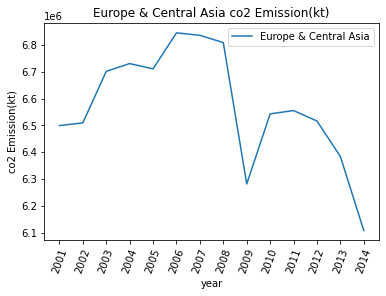

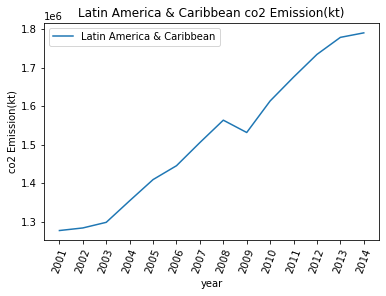

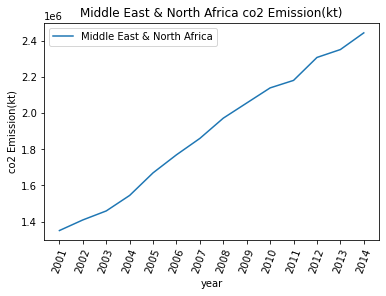

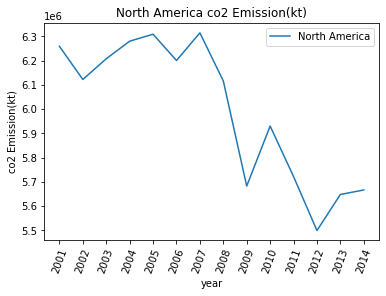

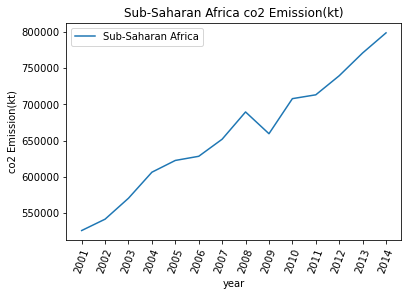

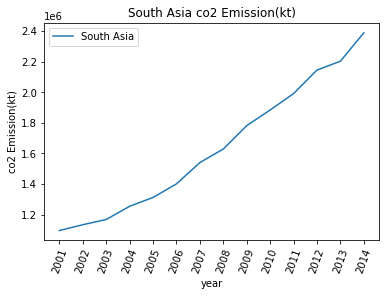

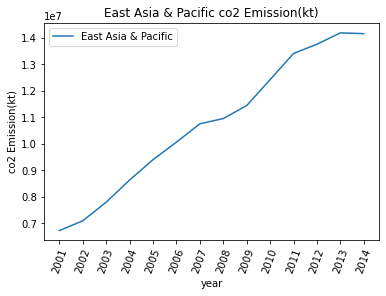

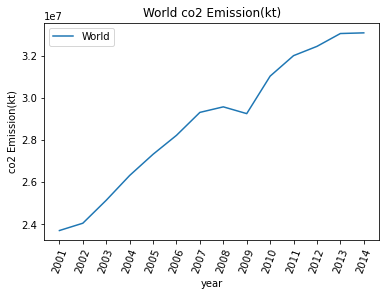

In [1741]:
#using a for loop and plot function to plot all columns in co2
for col in co2.columns:
    plots(co2[col], col , 'co2 Emission(kt)')

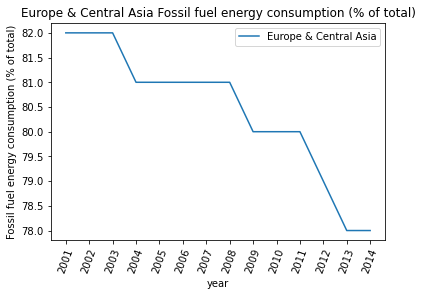

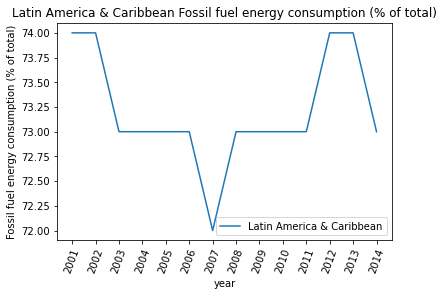

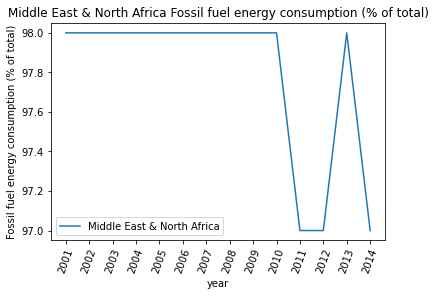

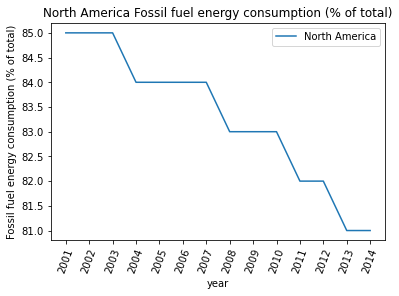

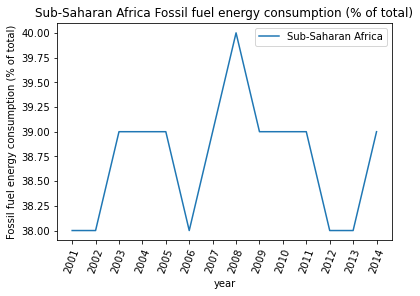

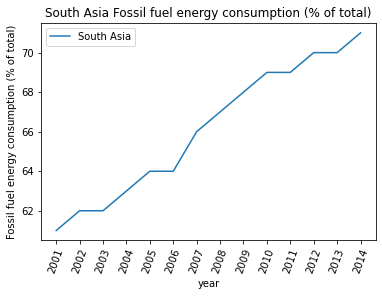

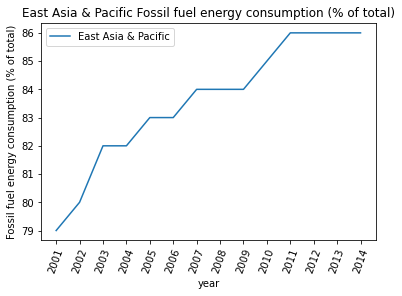

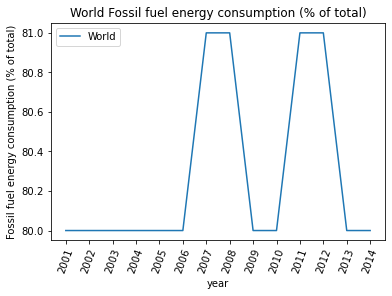

In [1742]:
#transpose for easier plotting
plot_fossil = fossil.transpose()

#using a for loop and plot function to plot all columns in fossil
for col in plot_fossil.columns:
    plots(plot_fossil[col], 
          col, 
          'Fossil fuel energy consumption (% of total)'
         )

In [1745]:
co2.describe()

Region,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,Sub-Saharan Africa,South Asia,East Asia & Pacific,World
count,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,14.000000,1.400000e+01,1.400000e+01,1.400000e+01
mean,6.573327e+06,1.518617e+06,1.894002e+06,5.997060e+06,659238.787267,1.637796e+06,1.077479e+07,2.889528e+07
std,2.164867e+05,1.819400e+05,3.685703e+05,2.933452e+05,82774.181679,4.329880e+05,2.596633e+06,3.239296e+06
min,6.107968e+06,1.276987e+06,1.350731e+06,5.499724e+06,526193.552841,1.095440e+06,6.734568e+06,2.370726e+07
25%,6.501615e+06,1.368060e+06,1.576136e+06,5.692675e+06,610686.094676,1.268685e+06,8.831726e+06,2.657096e+07
50%,6.548931e+06,1.518518e+06,1.916304e+06,6.119227e+06,655919.577639,1.584665e+06,1.085667e+07,2.928299e+07
75%,6.725341e+06,1.659866e+06,2.170657e+06,6.246086e+06,712034.236043,1.964645e+06,1.316307e+07,3.176097e+07
max,6.844736e+06,1.790321e+06,2.443882e+06,6.314306e+06,798787.276962,2.389180e+06,1.418534e+07,3.308519e+07


In [1750]:
# transpose dataframe to make the shape of both dataframe the same before checking for correlation
co2_transpose = co2.transpose()
co2_fossil_correlation = correlation(co2_transpose, fossil)
co2_fossil_correlation = pd.DataFrame(co2_fossil_correlation)#correlation between data frame
co2_fossil_correlation

,0
Region,
Europe & Central Asia,0.637510
Latin America & Caribbean,0.009037
Middle East & North Africa,-0.613066
North America,0.842089
Sub-Saharan Africa,0.181465
South Asia,0.982419
East Asia & Pacific,0.972389
World,0.392781


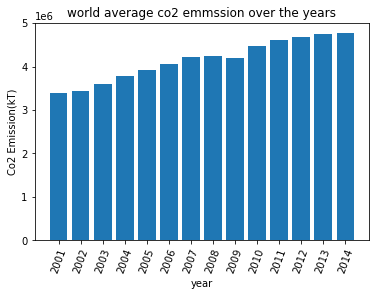

In [1751]:
#calculate mean of all region except world
co2['mean'] = co2.iloc[:,0:7].mean(axis=1)
co2

bar( co2.index, co2['mean'], 'world average co2 emmssion over the years')

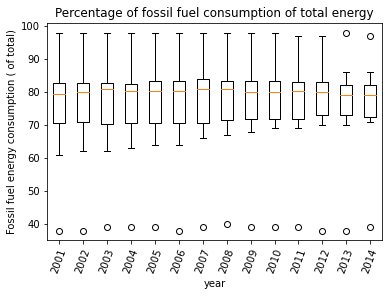

In [1712]:
boxplot(fossil, 
        'Percentage of fossil fuel consumption of total energy', 
        'Fossil fuel energy consumption ( of total)'
       )

In [1754]:
fossil.transpose().describe()

Region,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,Sub-Saharan Africa,South Asia,East Asia & Pacific,World
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,80.428571,73.214286,97.785714,83.285714,38.714286,66.142857,83.571429,80.285714
std,1.342460,0.578934,0.425815,1.382783,0.611250,3.438630,2.243428,0.468807
min,78.000000,72.000000,97.000000,81.000000,38.000000,61.000000,79.000000,80.000000
25%,80.000000,73.000000,98.000000,82.250000,38.000000,63.250000,82.250000,80.000000
50%,81.000000,73.000000,98.000000,83.500000,39.000000,66.500000,84.000000,80.000000
75%,81.000000,73.750000,98.000000,84.000000,39.000000,69.000000,85.750000,80.750000
max,82.000000,74.000000,98.000000,85.000000,40.000000,71.000000,86.000000,81.000000
